In [18]:
%matplotlib inline
from pylab import *

In [19]:
from deficit_defs import *
from input_environment_defs import *

## Tuning Curves

In [19]:
#| output: false
base_image_file='asdf/bbsk081604_all_scale2.asdf'

fname=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

pre1=pn.neurons.natural_images(fname,
                               rf_size=19,verbose=False)

pre2=pn.neurons.natural_images(fname,rf_size=19,
                            other_channel=pre1,
                            verbose=False)

pre1+=pn.neurons.process.add_noise_normal(0,0.5) # a little noise
pre2+=pn.neurons.process.add_noise_normal(0,0.5) # a little noise


pre=pre1+pre2

number_of_neurons=5
post=pn.neurons.linear_neuron(number_of_neurons)
post+=pn.neurons.process.sigmoid(0,50)

c=pn.connections.BCM(pre,post,[-.01,.01],[.1,.2])
c+=pn.connections.process.orthogonalization(10*minute)
c.eta=2e-6
c.tau=15*minute   

sim=pn.simulation(4*day)
sim.dt=200*ms

save_interval=30*minute
sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)

sim+=pn.grating_response()

pn.run_sim(sim,[pre,post],[c],display_hash=True,print_time=True)
pn.save('sims/nr.asdf',sim,[pre,post],[c])
R=Results('sims/nr.asdf')

 [#############################99% (ETA: 0.4 s)############################# ]Grating time elapsed 5.26 s
Sim Time Elapsed...47.95 s


Manuscript/resources/fig-rf-theta-tuning-curve.png
Manuscript/resources/fig-rf-theta-tuning-curve.svg


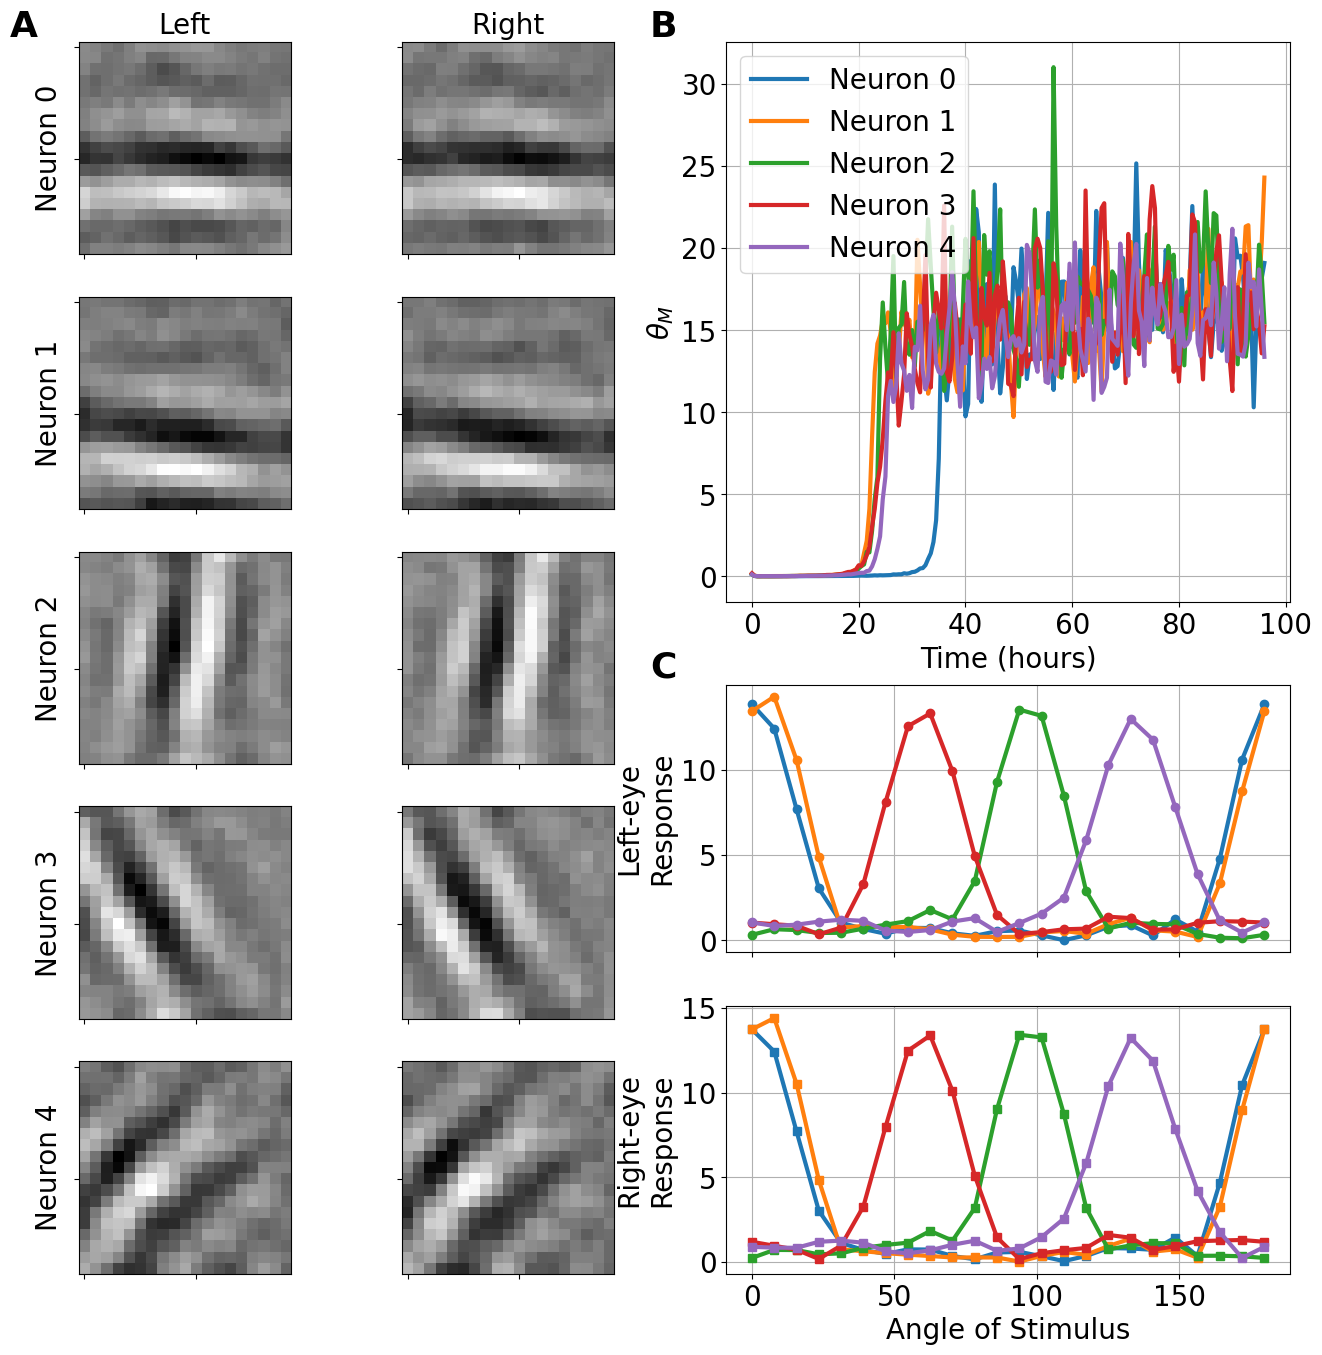

In [21]:
def mysubplot(R,C,r,c):
    from matplotlib.pyplot import subplot2grid
    subplot2grid((R, C), (r, c))
    
def argmax_rc(X):
    """Return the row and col of the maximum value"""
    r,c=np.unravel_index(np.argmax(X), X.shape)
    return r,c
    
figure(figsize=(16,16))
    
w_im=R.weight_image(R.W[-1,::])
number_of_neurons=w_im.shape[0]

for n in range(number_of_neurons):
    vmin=w_im[n,:,:,:].min()
    vmax=w_im[n,:,:,:].max()
    for c in range(2):
        mysubplot(number_of_neurons,4,n,c)
        im=w_im[n,c,:,:]
        imshow(im,cmap=plt.cm.gray,vmin=vmin,vmax=vmax,interpolation='nearest')
        plt.grid(False)
        if c==0:
            ylabel(f'Neuron {n}')
            
        if n==0:
            if c==0:
                title("Left")
            else:
                title("Right")
            
        gca().set_xticklabels([])
        gca().set_yticklabels([])
        
        if n==0 and c==0:  # upper left
            
            plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
                fontsize=26, fontweight='bold', va='top')


        
mysubplot(2,2,0,1)
plot(R.t/hour,R.θ,label=[f'Neuron {i}' for i in [0,1,2,3,4]])
ylabel(r'$\theta_M$')
xlabel('Time (hours)')
legend();
plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')
        
        
t,y=R.all_responses[0]
mysubplot(4,2,2,1)
for neuron in range(number_of_neurons):
    y_left=y[:,:,0,neuron,-1]  
    y_right=y[:,:,1,neuron,-1]  
    
    r,c=argmax_rc(y_left)
    tuning_curve=y_left[r,:]    
    plot(R.theta_mat,tuning_curve,'-o')
    ylabel('Left-eye\nResponse')
    gca().set_xticklabels([])

    
    
mysubplot(4,2,3,1)
for neuron in range(number_of_neurons):
    y_left=y[:,:,0,neuron,-1]  
    y_right=y[:,:,1,neuron,-1]  
    
    r,c=argmax_rc(y_right)
    tuning_curve=y_right[r,:]
    plot(R.theta_mat,tuning_curve,'-s')    
    ylabel('Right-eye\nResponse')
    xlabel('Angle of Stimulus')
        
plt.text(.5, 0.5, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')
        
    
savefig('fig-rf-theta-tuning-curve.png')
    

## Original Images

In [3]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)


imfname=pi5.filtered_images(
                            base_image_file,
                            )

image_data=pi5.asdf_load_images(imfname)



Base Image File: asdf/bbsk081604_all_scale2.asdf
Using cache_images/cache_images_3022abd002cdb9148ddc6391a446d321.asdf from cache.

Manuscript/resources/fig-orig.png
Manuscript/resources/fig-orig.svg


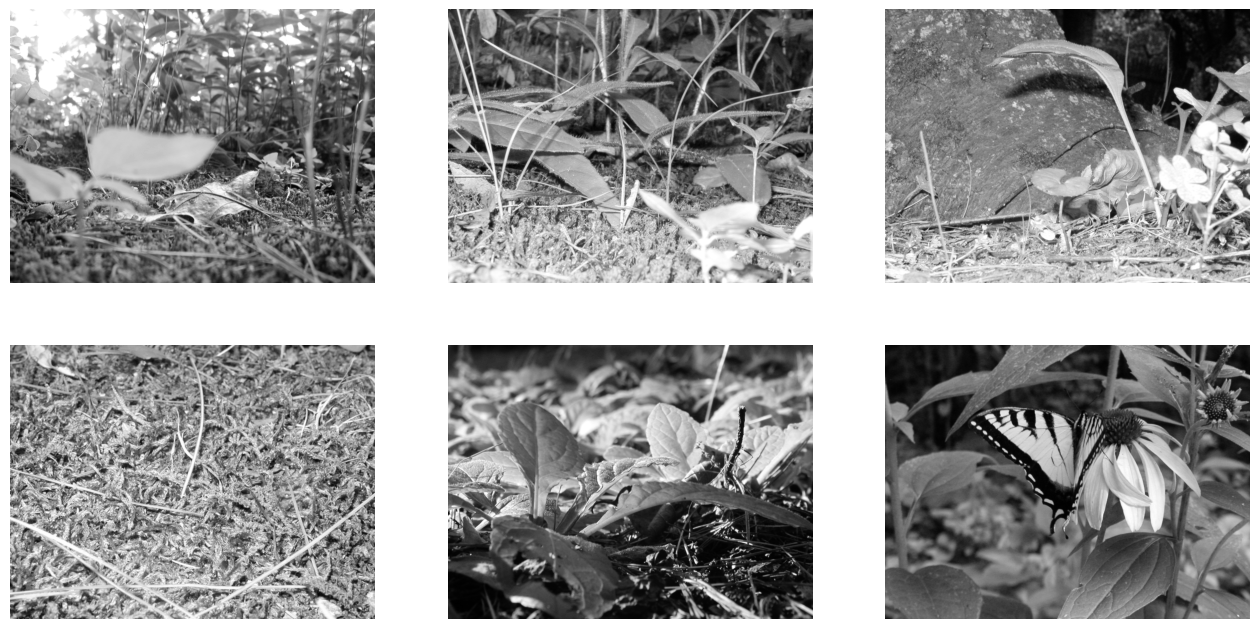

In [4]:
im=[_*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1] for _ in image_data['im'][:6]]
figure(figsize=(16,8))
for i in range(6):
    subplot(2,3,i+1)
    imshow(im[i],cmap=plt.cm.gray)
    axis('off')
    
savefig('fig-orig.png')

## LGN responses (DOG)

In [5]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
imfname=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                                    verbose=False,
                    )
image_data=pi5.asdf_load_images(imfname)
im=[_*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1] for _ in image_data['im'][:6]]


Manuscript/resources/fig-LGNresponses.png
Manuscript/resources/fig-LGNresponses.svg


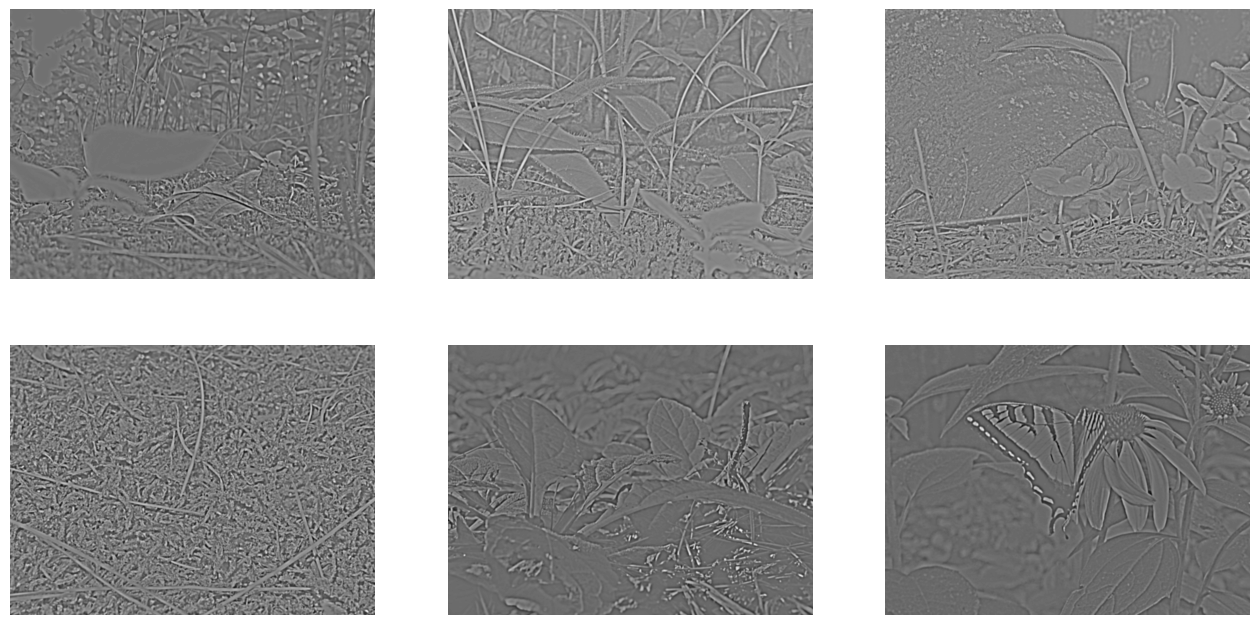

In [6]:
figure(figsize=(16,8))
for i in range(6):
    subplot(2,3,i+1)
    imshow(im[i],cmap=plt.cm.gray)
    axis('off')
    
savefig('fig-LGNresponses.png')

## Normal Inputs

In [4]:
im1=im2=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

sim,X=get_input_examples(im1,im2,
                        noise1=0,noise2=0)

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.

Manuscript/resources/fig-normal_patches.png
Manuscript/resources/fig-normal_patches.svg


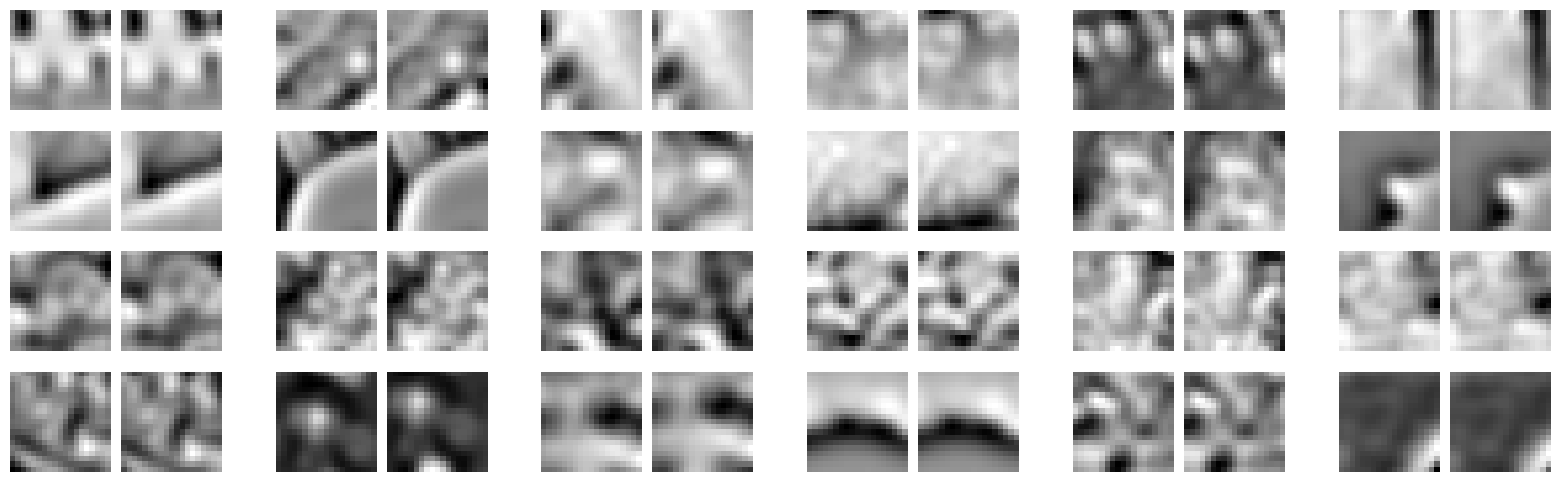

In [5]:

ims=inputs_to_images(X,buffer=2,scale_each_patch=True)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')

    
savefig('fig-normal_patches.png')

## Blurred Inputs

In [14]:
im1=pi5.filtered_images(
                    base_image_file,
                    {'type':'blur','size':2.5},
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )
im2=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

sim,X=get_input_examples(im1,im2,
                        noise1=0,noise2=0)

Using cache_images/cache_images_095974298c9effb5b0e5d1385547451f.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.

Manuscript/resources/fig-blurred-inputs.png
Manuscript/resources/fig-blurred-inputs.svg


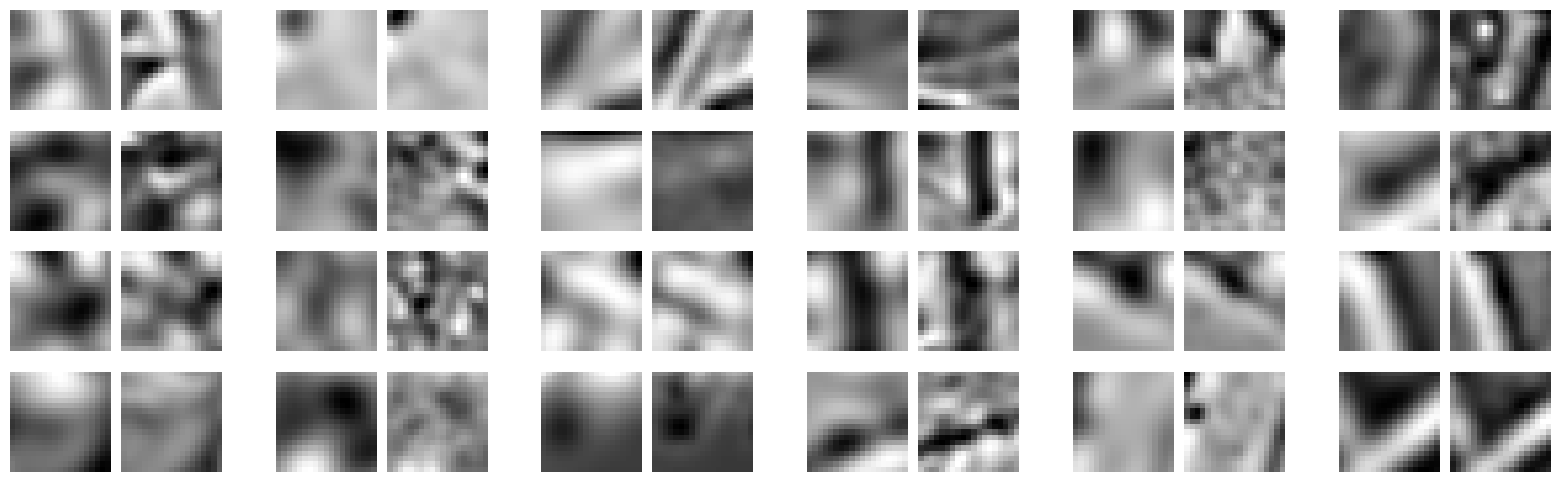

In [15]:

ims=inputs_to_images(X,buffer=2,scale_each_patch=True)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')

    
savefig('fig-blurred-inputs.png')

## Jitter Inputs

In [9]:
im1=im2=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

mu_r,mu_c=2,10
sigma_r,sigma_c=1,2

sim,X=get_input_examples(im1,im2,
                        noise1=0,noise2=0,
                        mu_r=mu_r,mu_c=mu_c,sigma_r=sigma_r,sigma_c=sigma_c,                         
                        )

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.

Manuscript/resources/fig-jitter-inputs.png
Manuscript/resources/fig-jitter-inputs.svg


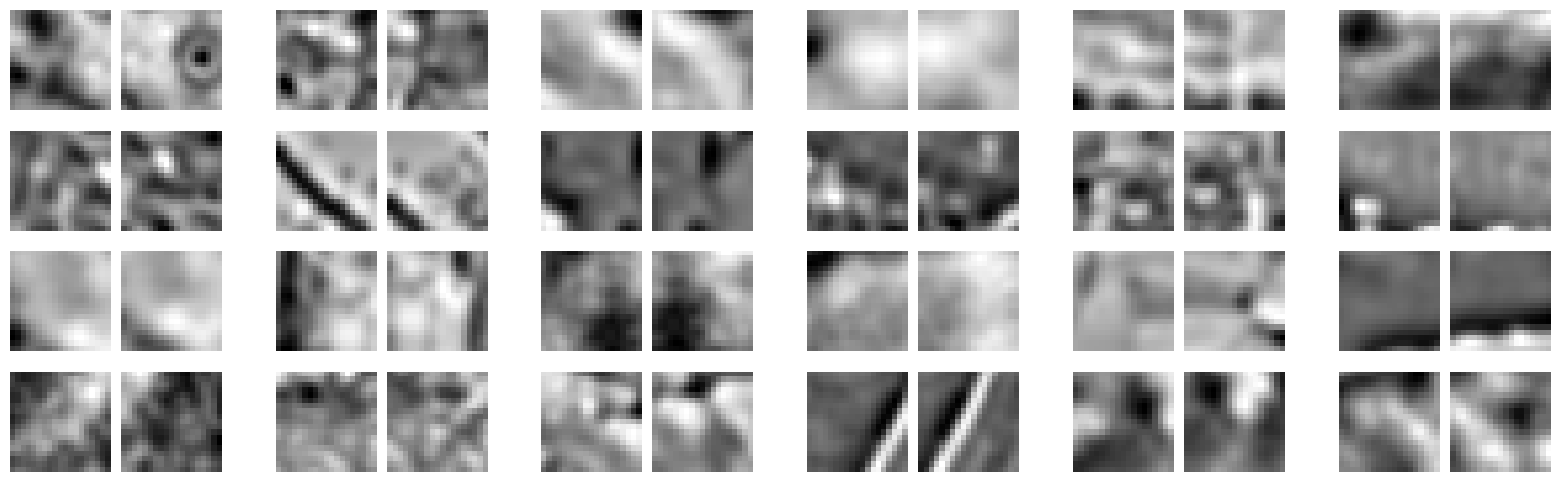

In [10]:
ims=inputs_to_images(X,buffer=2,scale_each_patch=True)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')
    
savefig('fig-jitter-inputs.png')

Manuscript/resources/fig-jitter-locations.png
Manuscript/resources/fig-jitter-locations.svg


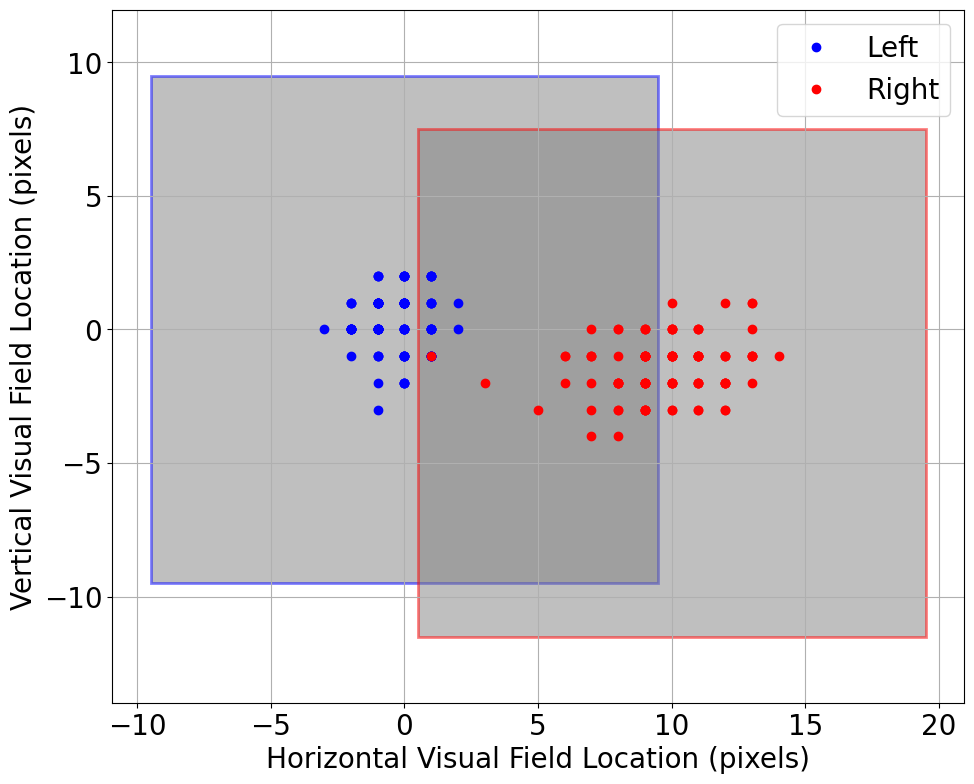

In [7]:
import matplotlib.patches as patches
ca=sim.monitors['ca'].array()
ra=sim.monitors['ra'].array()
c=sim.monitors['c'].array()
r=sim.monitors['r'].array()

ca_1=sim.monitors['ca_1'].array()
ra_1=sim.monitors['ra_1'].array()
c_1=sim.monitors['c_1'].array()
r_1=sim.monitors['r_1'].array()

figure(figsize=(11,9))
plot(ca-c,-(ra-r),'bo',label='Left')

plot(ca_1-c_1,-(ra_1-r_1),'ro',label='Right')
rect = patches.Rectangle((-19/2, -19/2), 19, 19, linewidth=1, edgecolor='b',lw=2, facecolor='gray',alpha=0.5)
gca().add_patch(rect)
rect = patches.Rectangle((-19/2+mu_c, -19/2-mu_r), 19, 19, linewidth=1, edgecolor='r', lw=2,facecolor='gray',alpha=0.5)
gca().add_patch(rect)
axis('equal');

xlabel('Horizontal Visual Field Location (pixels)')
ylabel('Vertical Visual Field Location (pixels)');
legend();

savefig('fig-jitter-locations.png')


## Patch treatment

In [6]:
im1=im2=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )
sim,X=get_input_examples(im1,im2,
                        noise1=0,noise2=1,
                        scale1=1,scale2=0)

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.

Manuscript/resources/fig-patch-inputs.png
Manuscript/resources/fig-patch-inputs.svg


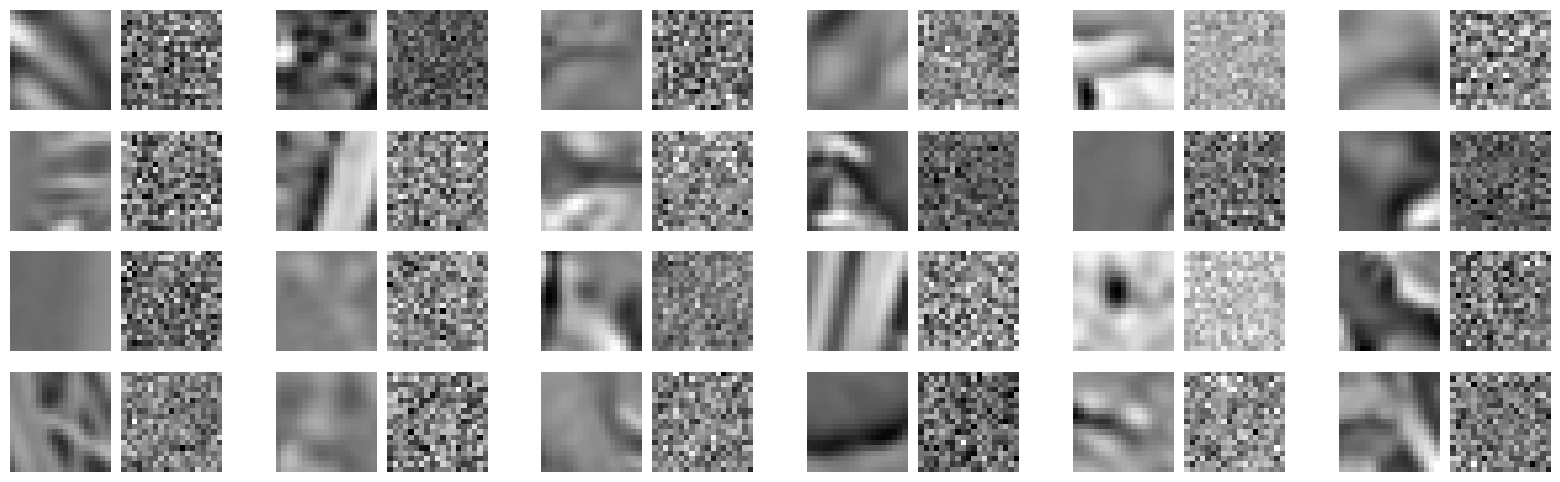

In [7]:
ims=inputs_to_images(X,buffer=2,scale_each_patch=True)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')


savefig('fig-patch-inputs.png')

## Contrast Modulation

In [14]:
im1=im2=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

sim,X=get_input_examples(im1,im2,
                        noise1=0,noise2=0,
                         scale1=1,scale2=0.4,
                        )

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.

Manuscript/resources/fig-contrast-modified-inputs.png
Manuscript/resources/fig-contrast-modified-inputs.svg


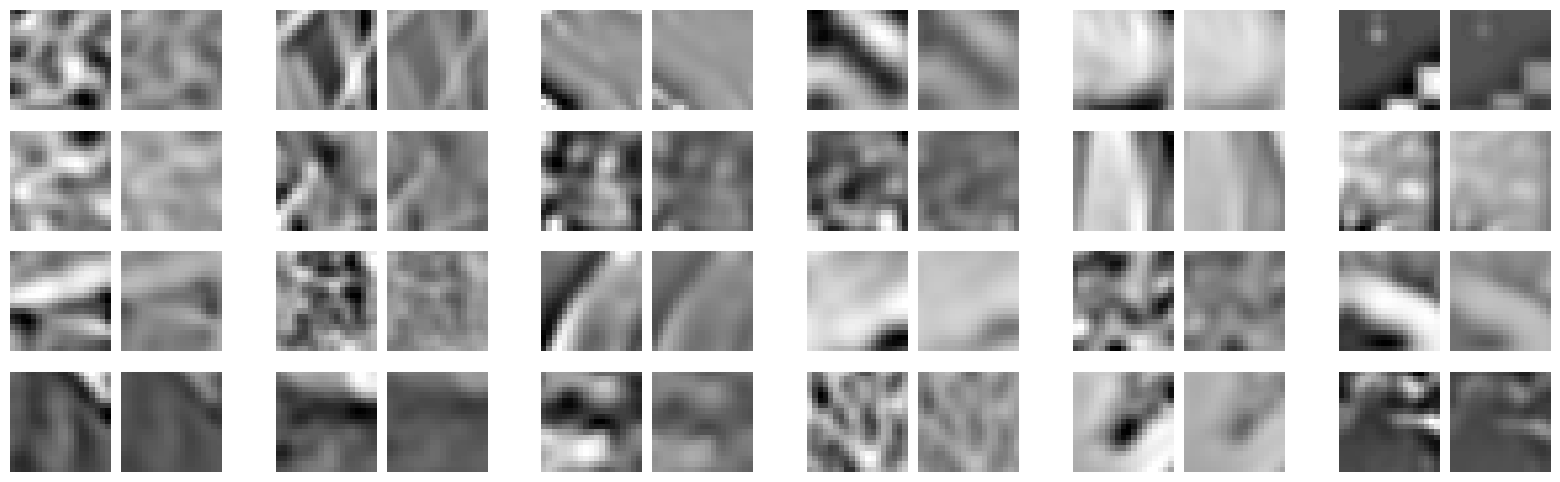

In [15]:
ims=inputs_to_images(X,buffer=2,scale_each_patch=True)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')


savefig('fig-contrast-modified-inputs.png')

## Atropine treatment

In [16]:
im1=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

im2=pi5.filtered_images(
                    base_image_file,
                    {'type':'blur','size':2.5},
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

sim,X=get_input_examples(im1,im2,
                        noise1=0,noise2=0)

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_095974298c9effb5b0e5d1385547451f.asdf from cache.

Manuscript/resources/fig-atropine-inputs.png
Manuscript/resources/fig-atropine-inputs.svg


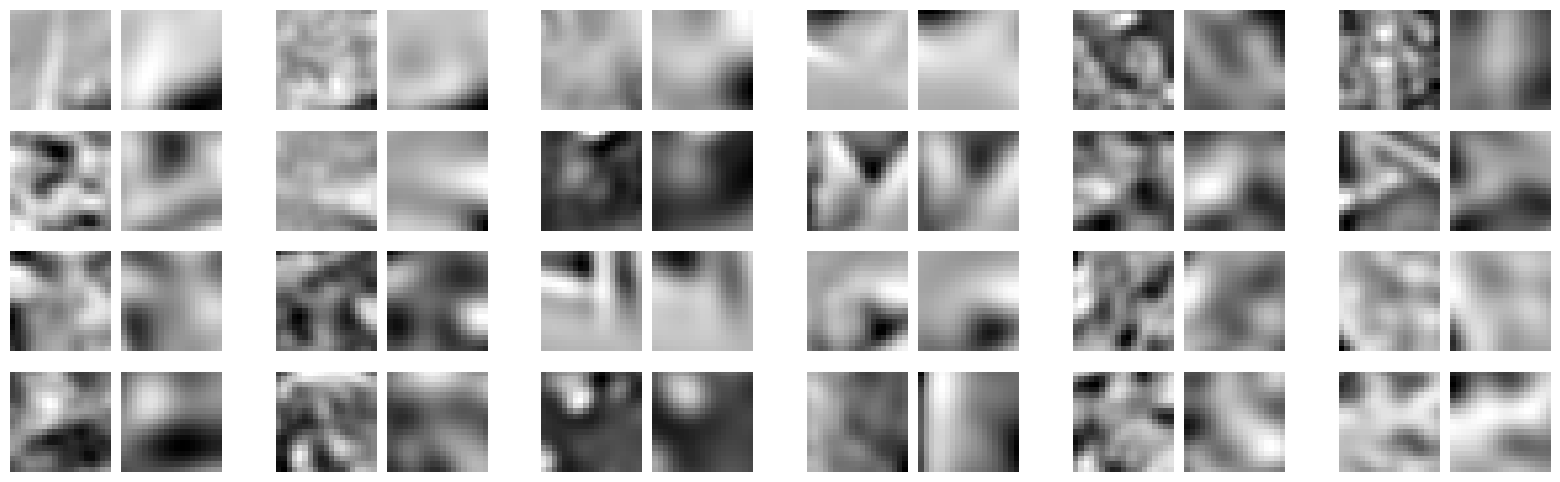

In [17]:
ims=inputs_to_images(X,buffer=2,scale_each_patch=True)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')


savefig('fig-atropine-inputs.png')